<a href="https://colab.research.google.com/github/sharibhumayun/Logic2.0/blob/main/2.Base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/sharibhumayun/Logic2.0/main/MasterDatabase.csv'

df = pd.read_csv(path)
df.head()

,Current_connection,City,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions
0,Mobily,JEDDAH,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,NaN,10.0,10.0,NaN,10.0,NaN,NaN,NaN
1,Mobily,JEDDAH,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,NaN,8.0,9.0,NaN,10.0,NaN,NaN,NaN
2,Mobily,MAKKAH AL MUKARRAMAH,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,NaN,NaN,7.0,NaN,10.0,NaN,NaN,NaN
3,Mobily,AR RIYADH,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,NaN,5.0,4.0,4.0,6.0,5.0,5.0,NaN
4,Mobily,KHAMIS MUSHAYT,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,NaN,10.0,10.0,NaN,10.0,NaN,NaN,NaN


In [3]:
df.shape

(29072, 21)

**Data** **Preprocessing**

In [4]:
df.isnull().sum()

Current_connection                0
City                              0
Region                            0
Nationality                       0
Gender                            0
Exact_Age                        66
Connection                        0
Segment                           0
Performance                      98
Preference                      561
TRIM_Index                        0
Communication                  1301
Proposition                     652
Sales_Experience              28085
Opt_inout                       950
Network_Satisfaction            115
Customer_Support              19914
Billing_Payment                 812
Website_performance           19448
Mobileapp_satisfaction        18435
Performance_SNS_Promotions    23878
dtype: int64

In [5]:
df.dtypes

Current_connection             object
City                           object
Region                         object
Nationality                    object
Gender                         object
Exact_Age                     float64
Connection                     object
Segment                        object
Performance                   float64
Preference                    float64
TRIM_Index                      int64
Communication                 float64
Proposition                   float64
Sales_Experience              float64
Opt_inout                     float64
Network_Satisfaction          float64
Customer_Support              float64
Billing_Payment               float64
Website_performance           float64
Mobileapp_satisfaction        float64
Performance_SNS_Promotions    float64
dtype: object

In [6]:
# Insert the missing values with the median of each column
df['Exact_Age'] = df['Exact_Age'].fillna(value = df['Exact_Age'].median())
df['Performance'] = df['Performance'].fillna(value = df['Performance'].median())
df['Preference'] = df['Preference'].fillna(value = df['Preference'].median())
df['Communication'] = df['Communication'].fillna(value = df['Communication'].median())
df['Proposition'] = df['Proposition'].fillna(value = df['Proposition'].median())
df['Sales_Experience'] = df['Sales_Experience'].fillna(value = df['Sales_Experience'].median())
df['Opt_inout'] = df['Opt_inout'].fillna(value = df['Opt_inout'].median())
df['Network_Satisfaction'] = df['Network_Satisfaction'].fillna(value = df['Network_Satisfaction'].median())
df['Customer_Support'] = df['Customer_Support'].fillna(value = df['Customer_Support'].median())
df['Billing_Payment'] = df['Billing_Payment'].fillna(value = df['Billing_Payment'].median())
df['Website_performance'] = df['Website_performance'].fillna(value = df['Website_performance'].median())
df['Mobileapp_satisfaction'] = df['Mobileapp_satisfaction'].fillna(value = df['Mobileapp_satisfaction'].median())
df['Performance_SNS_Promotions'] = df['Performance_SNS_Promotions'].fillna(value = df['Performance_SNS_Promotions'].median())



In [7]:
df.isnull().sum()

Current_connection            0
City                          0
Region                        0
Nationality                   0
Gender                        0
Exact_Age                     0
Connection                    0
Segment                       0
Performance                   0
Preference                    0
TRIM_Index                    0
Communication                 0
Proposition                   0
Sales_Experience              0
Opt_inout                     0
Network_Satisfaction          0
Customer_Support              0
Billing_Payment               0
Website_performance           0
Mobileapp_satisfaction        0
Performance_SNS_Promotions    0
dtype: int64

In [8]:
# Insert new column Digital_performance taking the average of Website, Mobile app and Social media satisfaction
df['Digital_performance'] = df[['Performance_SNS_Promotions', 'Mobileapp_satisfaction','Website_performance']].mean(axis = 1).round()

In [9]:
df.head()

,Current_connection,City,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance
0,Mobily,JEDDAH,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0
1,Mobily,JEDDAH,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,8.0,10.0,9.0,9.0
2,Mobily,MAKKAH AL MUKARRAMAH,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,8.0,10.0,9.0,9.0
3,Mobily,AR RIYADH,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,5.0,5.0,9.0,6.0
4,Mobily,KHAMIS MUSHAYT,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0


In [10]:
print(df['Current_connection'].unique())
print(df['Region'].unique())
print(df['Nationality'].unique())
print(df['Gender'].unique())
print(df['Connection'].unique())
print(df['Segment'].unique())

['Mobily' 'Lebara' 'Friendi' 'Virgin' 'Jawwy' 'STC' 'Zain']
['Western' 'Central' 'South' 'Others' 'Northern' 'Eastern']
['Nationals' 'Expat Asians' 'Expat Arabs']
['Female' 'Male']
['Prepaid' 'Postpaid' 'PostpaidData' 'PrepaidData']
['LV' 'VLV' 'VHV' 'HV' 'MV' 'Data']


In [11]:
# Drop City as Region is already included
df.drop(['City'],axis = 1, inplace = True)

In [12]:
df.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance
0,Mobily,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0
1,Mobily,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,8.0,10.0,9.0,9.0
2,Mobily,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,8.0,10.0,9.0,9.0
3,Mobily,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,5.0,5.0,9.0,6.0
4,Mobily,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0


In [13]:
## Convert the Object items to Number system
df= pd.get_dummies(df,drop_first = True)
df.head()

,Exact_Age,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance,Current_connection_Jawwy,Current_connection_Lebara,Current_connection_Mobily,Current_connection_STC,Current_connection_Virgin,Current_connection_Zain,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV
0,23.0,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,35.0,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,8.0,10.0,9.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
2,32.0,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,8.0,10.0,9.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
3,31.0,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,5.0,5.0,9.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16.0,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


In [14]:
df.drop(['Website_performance','Mobileapp_satisfaction', 'Performance_SNS_Promotions'], axis = 1, inplace = True)

In [15]:
df.head()

,Exact_Age,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,Current_connection_Jawwy,Current_connection_Lebara,Current_connection_Mobily,Current_connection_STC,Current_connection_Virgin,Current_connection_Zain,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV
0,23.0,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,35.0,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
2,32.0,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
3,31.0,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16.0,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


In [16]:
df_x = df.drop('TRIM_Index', axis = 1)


In [17]:
df['Current_connection_Mobily'].value_counts()

1    14570
0    14502
Name: Current_connection_Mobily, dtype: int64

**Identification of Outliers**

In [18]:
from scipy.stats import zscore
df['zscore_TRIM'] = zscore(df.TRIM_Index)
df.head()

,Exact_Age,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,Current_connection_Jawwy,Current_connection_Lebara,Current_connection_Mobily,Current_connection_STC,Current_connection_Virgin,Current_connection_Zain,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV,zscore_TRIM
0,23.0,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.685403
1,35.0,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1.159336
2,32.0,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,-0.736396
3,31.0,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,-2.158194
4,16.0,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1.159336


In [19]:
df[(df.zscore_TRIM> 3) | (df.zscore_TRIM < -3)]

,Exact_Age,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,Current_connection_Jawwy,Current_connection_Lebara,Current_connection_Mobily,Current_connection_STC,Current_connection_Virgin,Current_connection_Zain,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV,zscore_TRIM


{'boxes': [<matplotlib.lines.Line2D at 0x7f6a52cf5dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6a52c8a7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6a52c9a278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6a52c8aeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6a52c8a128>,
  <matplotlib.lines.Line2D at 0x7f6a52c8a438>]}

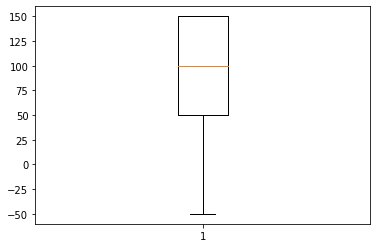

In [20]:
plt.boxplot(df.TRIM_Index)

In [21]:
## No outliers are identified so, we will proceed with the full dataset

**Check for Multicollinearity**`

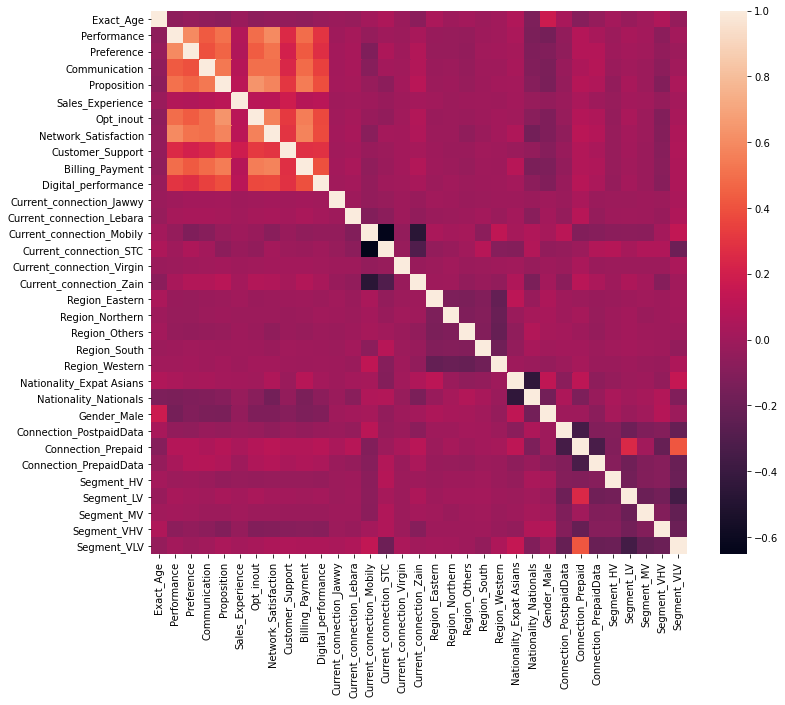

In [22]:
plt.figure(figsize = (12,10))
sns.heatmap(df_x.corr())

In [23]:
df_mobily = df[df['Current_connection_Mobily']==1]

In [24]:
df_mobily.head()

,Exact_Age,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,Current_connection_Jawwy,Current_connection_Lebara,Current_connection_Mobily,Current_connection_STC,Current_connection_Virgin,Current_connection_Zain,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV,zscore_TRIM
0,23.0,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.685403
1,35.0,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1.159336
2,32.0,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,-0.736396
3,31.0,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,-2.158194
4,16.0,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1.159336


In [25]:
df_mobily.shape

(14570, 35)

In [26]:
df_mobily.drop(['Exact_Age', 'Current_connection_Mobily', 'Current_connection_Jawwy','Current_connection_Lebara', 'Current_connection_STC', 'Current_connection_Virgin','Current_connection_Zain', 'zscore_TRIM','Performance', 'Preference'],axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_mobily.head()

,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,Region_Eastern,Region_Northern,Region_Others,Region_South,Region_Western,Nationality_Expat Asians,Nationality_Nationals,Gender_Male,Connection_PostpaidData,Connection_Prepaid,Connection_PrepaidData,Segment_HV,Segment_LV,Segment_MV,Segment_VHV,Segment_VLV
0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,9.0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
2,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,9.0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
3,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,6.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


Check for Multi colinearity

In [28]:
df_mobily_x= df_mobily.drop('TRIM_Index',axis =1)

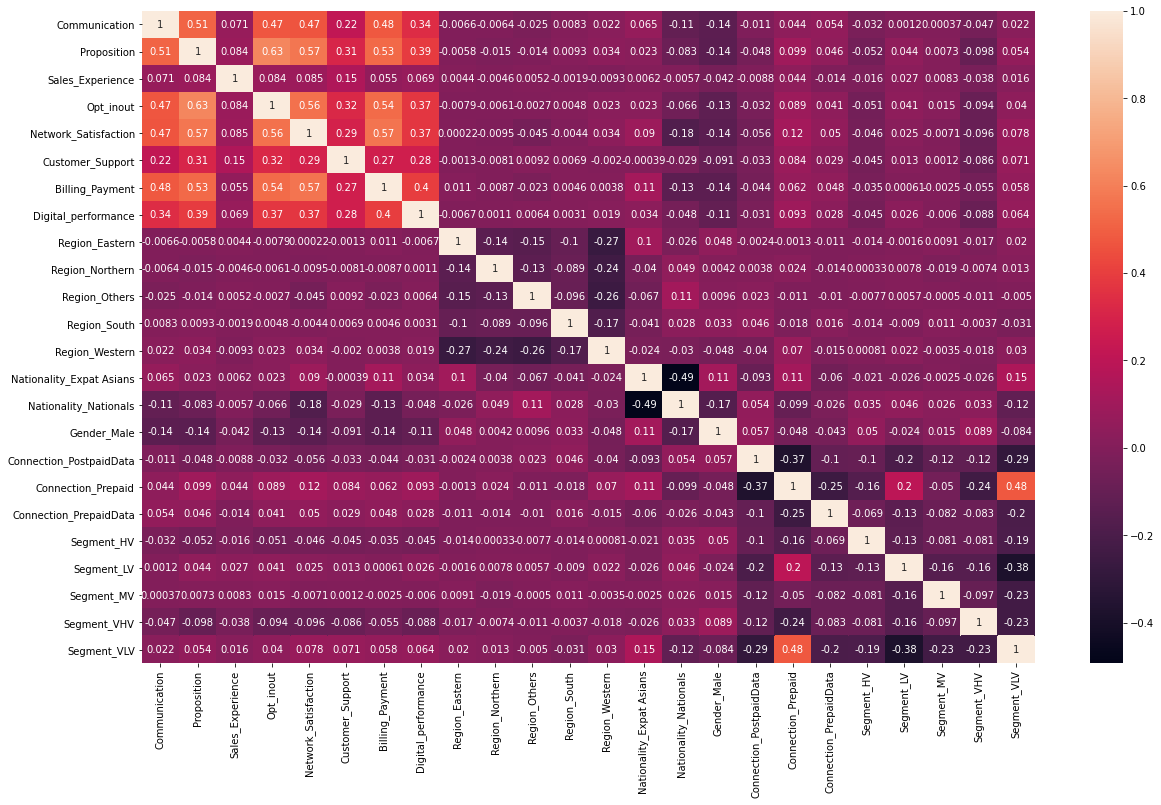

In [29]:
plt.figure(figsize=(20,12))
sns.heatmap(df_mobily_x.corr(), annot = True)

**Model Building**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
x = df_mobily_x
y= df_mobily['TRIM_Index']

In [33]:
lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 5)

In [34]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred= lr.predict(x_test)
y_pred

array([106.71413527, 102.92831133,   5.36428619, ..., 125.56460875,
        42.97361029, 126.66619067])

In [36]:
y_test

1464     150
6376      75
15934    -25
19200     25
13081    150
        ... 
16583    100
23692    150
18062    150
12789     50
12279    150
Name: TRIM_Index, Length: 4809, dtype: int64

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lr.score(x_test,y_test)

0.4829906897502092

In [39]:
mse= mean_squared_error(y_pred,y_test)
print(mse)

1470.6911312702782


In [40]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_pred, y_test))

38.34959101829221

In [41]:
np.round(metrics.r2_score(y_pred, y_test),2)

-0.08

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


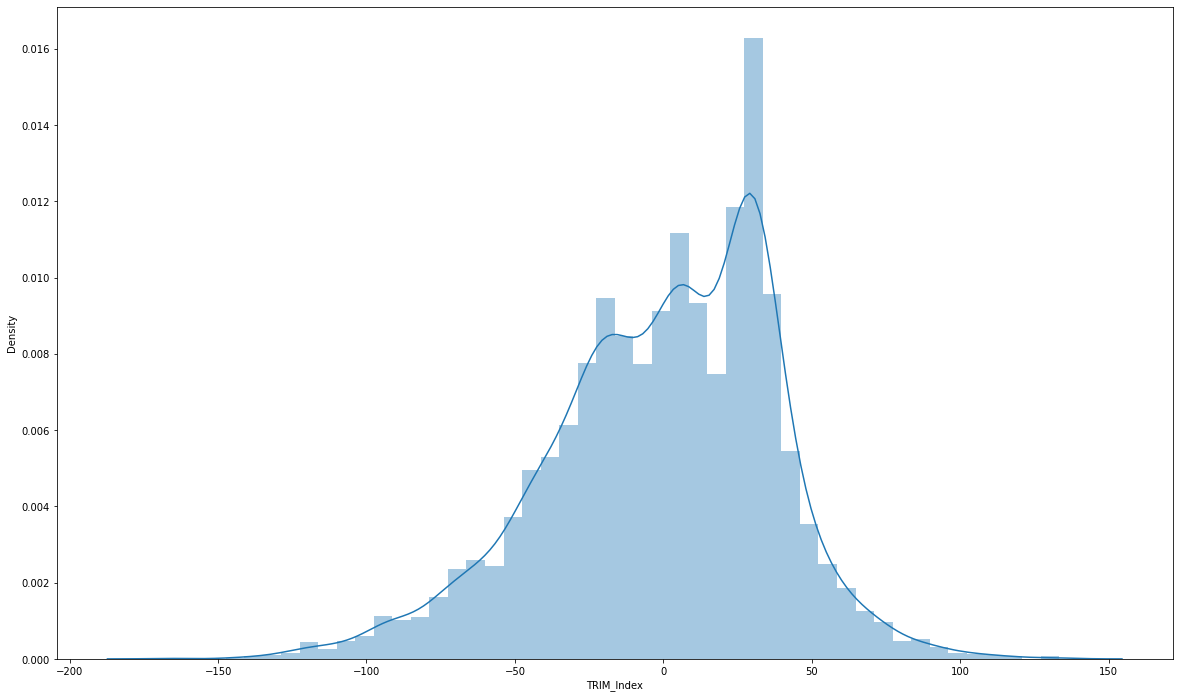

In [42]:
plt.figure(figsize=(20,12))
sns.distplot(y_test - y_pred)

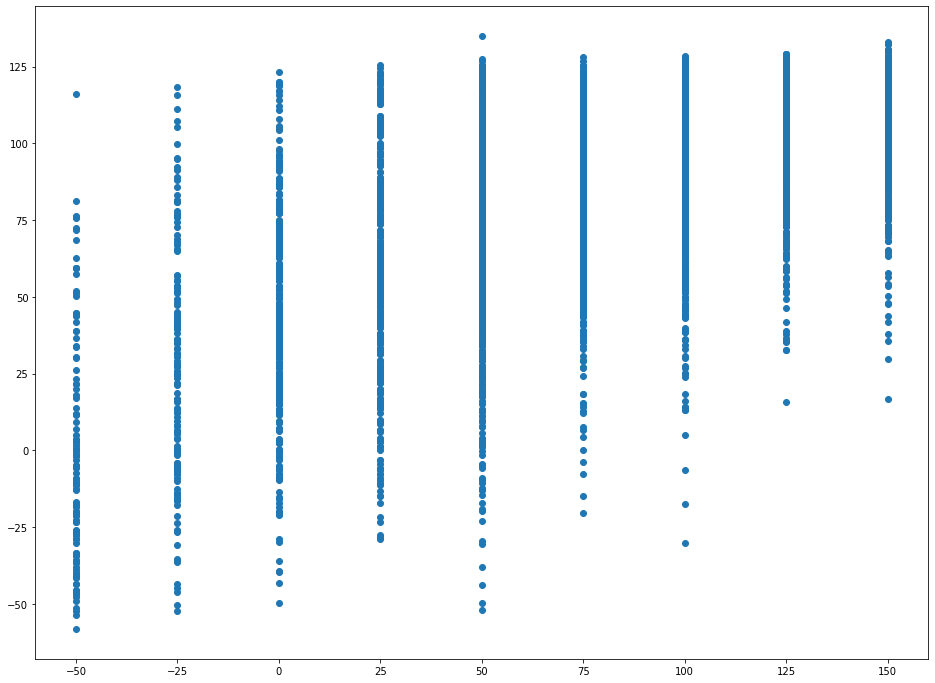

In [43]:
plt.figure(figsize=(16,12))
plt.scatter(y_test, y_pred)


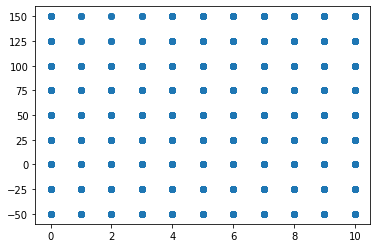

In [52]:
plt.scatter (x= df_mobily['Proposition'], y = df_mobily['TRIM_Index'])

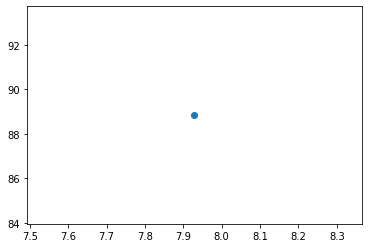

In [50]:
plt.scatter (x= df['Network_Satisfaction'].mean(), y = df['TRIM_Index'].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


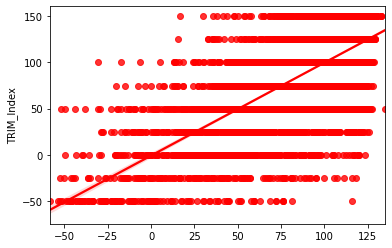

In [54]:
sns.regplot(y_pred,y_test, data = df_mobily, color='r')